# Simple linear regression: minimal example

## Import libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf

## Data generation

In [2]:
# Size of the training set
observations = 1000

# INPUT
# Generate arrays of random float
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))
# Generate input as a matrix from xs and zs with dimentions: observations x 2 
generated_inputs = np.column_stack((xs, zs))

# TARGET
noise = np.random.uniform(-1,1,(observations,1))
generated_targets = 2*xs - 3*zs + 5 + noise

# Save pre-formatted data in .npz file
np.savez('2_minimal_example_tf', inputs=generated_inputs, targets=generated_targets)

## Solving with TensorFlow

In [3]:
training_data = np.load('2_minimal_example_tf.npz')

In [16]:
input_size = 2
output_size = 1

# Initialize kernel (weight) and bias - you can use the default value too
model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                         kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                         bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1))
])

# instead of passing a default optimization fn (as optimizer='sgd' in model.compile)
# create a custom optimizer
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 22.9154
Epoch 2/100
1000/1000 - 0s - loss: 1.2915
Epoch 3/100
1000/1000 - 0s - loss: 0.4423
Epoch 4/100
1000/1000 - 0s - loss: 0.3609
Epoch 5/100
1000/1000 - 0s - loss: 0.4065
Epoch 6/100
1000/1000 - 0s - loss: 0.3684
Epoch 7/100
1000/1000 - 0s - loss: 0.3799
Epoch 8/100
1000/1000 - 0s - loss: 0.3844
Epoch 9/100
1000/1000 - 0s - loss: 0.4280
Epoch 10/100
1000/1000 - 0s - loss: 0.4245
Epoch 11/100
1000/1000 - 0s - loss: 0.3911
Epoch 12/100
1000/1000 - 0s - loss: 0.3616
Epoch 13/100
1000/1000 - 0s - loss: 0.3902
Epoch 14/100
1000/1000 - 0s - loss: 0.3823
Epoch 15/100
1000/1000 - 0s - loss: 0.4046
Epoch 16/100
1000/1000 - 0s - loss: 0.4022
Epoch 17/100
1000/1000 - 0s - loss: 0.3915
Epoch 18/100
1000/1000 - 0s - loss: 0.3886
Epoch 19/100
1000/1000 - 0s - loss: 0.3800
Epoch 20/100
1000/1000 - 0s - loss: 0.3944
Epoch 21/100
1000/1000 - 0s - loss: 0.3719
Epoch 22/100
1000/1000 - 0s - loss: 0.3889
Epoch 23/100
1000/1000 - 0s - loss: 0.37

## Extract the weigths and bias

In [17]:
model.layers[0].get_weights()

[array([[ 1.9637876],
        [-3.028791 ]], dtype=float32), array([5.0300326], dtype=float32)]

In [6]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0033667],
       [-3.03372  ]], dtype=float32)

In [7]:
bias = model.layers[0].get_weights()[1]
bias

array([5.0193944], dtype=float32)

## Extract the outputs (make predictions)

In [8]:
model.predict_on_batch(training_data['inputs'])

<tf.Tensor: id=6818, shape=(1000, 1), dtype=float32, numpy=
array([[-1.89073334e+01],
       [ 2.05946865e+01],
       [ 3.72201195e+01],
       [-1.29375687e+01],
       [-9.60894012e+00],
       [ 6.80349541e+00],
       [ 1.71958027e+01],
       [ 4.11654396e+01],
       [ 1.97986164e+01],
       [ 2.65082378e+01],
       [ 9.51296234e+00],
       [ 1.82053623e+01],
       [-7.54193449e+00],
       [ 2.63037605e+01],
       [ 2.23482132e+01],
       [ 1.83528957e+01],
       [ 1.17246113e+01],
       [-6.35836267e+00],
       [-1.93249168e+01],
       [-1.64222527e+01],
       [-8.78053474e+00],
       [-3.78613625e+01],
       [ 2.55057373e+01],
       [ 2.09113541e+01],
       [ 4.08352356e+01],
       [ 1.28935089e+01],
       [ 1.37462826e+01],
       [ 3.64260406e+01],
       [ 5.64756632e+00],
       [ 4.59044418e+01],
       [-1.87249107e+01],
       [ 2.24251032e+00],
       [ 1.62137642e+01],
       [-2.07638779e+01],
       [-3.79268646e+01],
       [-1.66818962e+01],
    

In [11]:
 training_data['targets']

array([[-1.95248466e+01],
       [ 2.11447829e+01],
       [ 3.75231243e+01],
       [-1.26132193e+01],
       [-8.80528300e+00],
       [ 6.23284580e+00],
       [ 1.77460294e+01],
       [ 4.01178857e+01],
       [ 2.07002638e+01],
       [ 2.70868033e+01],
       [ 9.10937244e+00],
       [ 1.74489797e+01],
       [-8.35008940e+00],
       [ 2.53067144e+01],
       [ 2.13274012e+01],
       [ 1.86038224e+01],
       [ 1.07090713e+01],
       [-6.25920652e+00],
       [-1.98653928e+01],
       [-1.67991011e+01],
       [-8.17245267e+00],
       [-3.79020101e+01],
       [ 2.62786599e+01],
       [ 2.10592291e+01],
       [ 4.03908705e+01],
       [ 1.21252961e+01],
       [ 1.38202766e+01],
       [ 3.55106515e+01],
       [ 5.25468244e+00],
       [ 4.57437724e+01],
       [-1.94699067e+01],
       [ 2.77115552e+00],
       [ 1.60012451e+01],
       [-2.12881367e+01],
       [-3.77000830e+01],
       [-1.62410185e+01],
       [ 3.19243260e+01],
       [-8.03208210e-01],
       [ 1.7

## Plotting the data

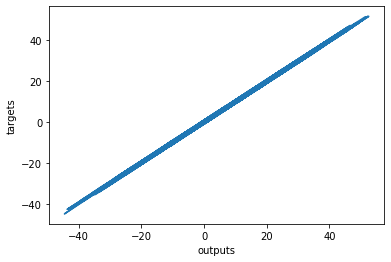

In [12]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()